# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Analyzing-data" data-toc-modified-id="Analyzing-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyzing data</a></div><div class="lev2 toc-item"><a href="#Dependencies" data-toc-modified-id="Dependencies-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dependencies</a></div><div class="lev2 toc-item"><a href="#Batch-effect-approaches" data-toc-modified-id="Batch-effect-approaches-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Batch effect approaches</a></div><div class="lev3 toc-item"><a href="#No-batch-effect-compensation" data-toc-modified-id="No-batch-effect-compensation-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>No batch effect compensation</a></div><div class="lev3 toc-item"><a href="#Batch-effect-compensation-build-into-the-statistical-model" data-toc-modified-id="Batch-effect-compensation-build-into-the-statistical-model-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Batch effect compensation build into the statistical model</a></div><div class="lev3 toc-item"><a href="#Removing-batch-effects-using-ComBat" data-toc-modified-id="Removing-batch-effects-using-ComBat-123"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Removing batch effects using ComBat</a></div><div class="lev3 toc-item"><a href="#Estimating-surrogate-variables-and-using-these-to-remove-batch-effects" data-toc-modified-id="Estimating-surrogate-variables-and-using-these-to-remove-batch-effects-124"><span class="toc-item-num">1.2.4&nbsp;&nbsp;</span>Estimating surrogate variables and using these to remove batch effects</a></div><div class="lev2 toc-item"><a href="#Visualizations" data-toc-modified-id="Visualizations-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Visualizations</a></div><div class="lev2 toc-item"><a href="#Conclusions" data-toc-modified-id="Conclusions-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Conclusions</a></div><div class="lev1 toc-item"><a href="#Setup" data-toc-modified-id="Setup-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup</a></div><div class="lev2 toc-item"><a href="#Parse-input" data-toc-modified-id="Parse-input-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Parse input</a></div><div class="lev1 toc-item"><a href="#Overview-visualization" data-toc-modified-id="Overview-visualization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Overview visualization</a></div><div class="lev1 toc-item"><a href="#Differential-expression" data-toc-modified-id="Differential-expression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Differential expression</a></div><div class="lev2 toc-item"><a href="#Without-batch-correction" data-toc-modified-id="Without-batch-correction-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Without batch correction</a></div><div class="lev2 toc-item"><a href="#With-batch-correction" data-toc-modified-id="With-batch-correction-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>With batch correction</a></div><div class="lev1 toc-item"><a href="#Run-ComBat-to-adjust" data-toc-modified-id="Run-ComBat-to-adjust-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Run ComBat to adjust</a></div><div class="lev2 toc-item"><a href="#ComBat-modelling-condition" data-toc-modified-id="ComBat-modelling-condition-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>ComBat modelling condition</a></div><div class="lev2 toc-item"><a href="#ComBat-PCA" data-toc-modified-id="ComBat-PCA-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>ComBat PCA</a></div><div class="lev3 toc-item"><a href="#Calculate-statistics" data-toc-modified-id="Calculate-statistics-521"><span class="toc-item-num">5.2.1&nbsp;&nbsp;</span>Calculate statistics</a></div><div class="lev2 toc-item"><a href="#ComBat-not-modelling-biological-factor" data-toc-modified-id="ComBat-not-modelling-biological-factor-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>ComBat not modelling biological factor</a></div><div class="lev3 toc-item"><a href="#ComBat-without-condition-modelling-PCA" data-toc-modified-id="ComBat-without-condition-modelling-PCA-531"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span>ComBat without condition-modelling PCA</a></div><div class="lev3 toc-item"><a href="#Statistics" data-toc-modified-id="Statistics-532"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span>Statistics</a></div><div class="lev1 toc-item"><a href="#Estimate-surrogate-variation" data-toc-modified-id="Estimate-surrogate-variation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Estimate surrogate variation</a></div><div class="lev2 toc-item"><a href="#Setup-model-matrices-and-estimate-number-of-surrogate-variables" data-toc-modified-id="Setup-model-matrices-and-estimate-number-of-surrogate-variables-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Setup model matrices and estimate number of surrogate variables</a></div><div class="lev2 toc-item"><a href="#Perform-surrogate-variation-analysis" data-toc-modified-id="Perform-surrogate-variation-analysis-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Perform surrogate variation analysis</a></div><div class="lev2 toc-item"><a href="#Calculate-significance-values" data-toc-modified-id="Calculate-significance-values-63"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Calculate significance values</a></div><div class="lev1 toc-item"><a href="#Summarize-significance" data-toc-modified-id="Summarize-significance-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Summarize significance</a></div>

# Analyzing data

In this part I explore how well we can distinguish spike-in proteins while working with samples under heavy influence from batch effects. Furthermore, I explore how different approaches for compensating for the batch effect influences the results in this simplified case.

## Dependencies

This analysis is purely performed in R. It uses the following R- and BioConductor-packages:

* `ggplot2`
* `ggfortify`
* `ggdendro`
* `gridExtra`
* `sva`

It also uses custom scripts for generation and visualization of the PCA components.

## Batch effect approaches

###  No batch effect compensation

Contrasts are performed as if there were no batch effect

### Batch effect compensation build into the statistical model

The data is unchanged but the batch effect is added as a confounding factor in the ANOVA model.

### Removing batch effects using ComBat

ComBat is a tool (available as part of the `sva` BioConductor package) attempting to estimate and remove batch effects directly from the data. It produces a new dataset for which contrasts are performed without using a confounding factor.

Batch effects are modelled in two ways. In one case, the ComBat model is provided information about the different conditions present in the data (as a vector of factors). In the second appraoch, the batch effects are modelled without providing information about the spike-in conditions to ComBat. 

One voiced concern about ComBat is that it can give 'wishful results' creating differences where there are none based on the modelled conditions. This is the reasoning behind running it without the biological condition as included input.

### Estimating surrogate variables and using these to remove batch effects

When running ComBat we use a known factor to model batch effects. When estimating the surrogate variables we instead estimate it directly from the data. P-values are then estimated using this information in addition to the raw data. This approarch is also part of the `sva` BioConductor package.

## Visualizations

I have used the PCA plot as the main tool to visualize the biological effect and the batch effect. In the unadjusted data, the batch effect clearly appears as the strongest effect being modelled by the principal component capturing 45% of the variation (might vary slightly between runs). The actual spike-in difference was modelled by the second, capturing 23% of the variance. 

After processing the data using ComBat the spike-in condition appears with the strongest effect showing 37% and 36% for data modelled with and without the condition levels. Based on this, ComBat seems to be doing a good job. On the other hand, when looking at the spikein data it didn't appear to work so well.

## Conclusions

The resulting spike-in values are shown at the end of this document under the header **Summarize significance**.

For this dataset, batch correction methods all resulted in a higher number of true positives  being detected. The problem was that the number of false positives increased 2-4 times compared to without applying the batch correction. In this particular dataset, it is hard to argue that the batch corrections were beneficial.

Out of the different methods used simply including the batch effect as a confounding factor in the statistical model was the method which included the least number of extra false positives.

It should be noted though that this is a quite simple simulated dataset. If using a more complex dataset where the difference between biological samples is less clear the approaches here might show better results. 

To get a further understanding of how the different methods influence the dataset of interest (in particular for the ComBat approaches) one approach could be to pick out features showing different results between the methods and visualize how their individual intensities are influenced.

What this experiment clearly indicates though is that one should tread carefully when performing further treatments to the data, and not take for granted that the used methods work well for all datasets. That the data sometimes even is better off without treatment.

For further reading, I recommend taking a look at the Nature opinion-article: [Tackling the widespread and critical impact of batch effects in high-throughput data](https://www.nature.com/articles/nrg2825)

# Setup

Load the data and required scripts and libraries. Prepare the wrapper-function used to generate principal component visualizations.

In [1]:
run <- "batch_nobatch"
expression_fp <- paste0(run, "/full_quant.tsv")
design_fp <- paste0(run, "/design.tsv")

In [2]:
source("util_scripts/proteomics_multivariate_vis.R")
source("util_scripts/visualization_utils.R")


In [3]:
library(ggplot2)
library(ggfortify)
library(ggdendro)
library(gridExtra)
library(sva)

source("util_scripts/proteomics_multivariate_vis.R")
source("util_scripts/visualization_utils.R")


Loading required package: mgcv
Loading required package: nlme
This is mgcv 1.8-22. For overview type 'help("mgcv-package")'.
Loading required package: genefilter


In [4]:
plot_pca <- function(data_m, design_m, pc1, pc2, color_factor, colors, custom_names, legend=T, title_app="", cont_scale=F) {
    
    if (!cont_scale) {
        getPalette <- colorRampPalette(RColorBrewer::brewer.pal(9, "Set1"))        
    }
    title <- paste0("PCA, PC", pc1, " vs PC", pc2, " ", title_app)
    plt <- make_expression_pca(data_m, design_m, color_factor=color_factor, title=title, 
                               pca_axis1=pc1, pca_axis2=pc2, show_labels=T,
                               only_text=T, color_text=T, custom_names=custom_names)
    if (!cont_scale) {
        plt <- plt + scale_color_manual(values=getPalette(colors))        
    }
    
    if (!legend) {
        plt <- plt + theme(legend.position="none")
    }
    
    plt
}

## Parse input

In [5]:
design_df <- read.csv(design_fp, sep="\t")
design_df$sample <- design_df$name
design_df$batch <- as.factor(design_df$batch)
print(design_df)

   name biorepgroup techrepgroup condition batch sample
1    a1           1            1         a     1     a1
2    a2           2            1         a     1     a2
3    a3           3            1         a     1     a3
4    a4           4            1         a     2     a4
5    a5           5            1         a     2     a5
6    a6           6            1         a     2     a6
7    b1           1            1         b     1     b1
8    b2           2            1         b     1     b2
9    b3           3            1         b     1     b3
10   b4           4            1         b     2     b4
11   b5           5            1         b     2     b5
12   b6           6            1         b     2     b6


In [6]:
raw_data_df <- read.csv(expression_fp, sep="\t")
head(raw_data_df)
raw_data_df$peptide <- as.character(raw_data_df$peptide)
raw_data_df$protein <- as.character(raw_data_df$protein)
data_df <- log2(raw_data_df[, as.character(design_df$name)])
head(data_df)

peptide,protein,a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6
FCR,sp|P0A7T7|RS18_ECOLI,214429092,140342700,141660496,154728400,134694504,190445100,200111300,147518496,150294600,142978900,126694296,111033500
LCR,sp|Q9JMR4|YUBK_ECOLI,60632400,51754800,27010700,29371800,45521500,44199300,40610500,24241700,27215600,16278100,10454500,54161500
FCQR,sp|P39357|YJHF_ECOLI,82801500,106809704,103172104,126872000,116927200,128321300,99170704,121863904,75656900,104284800,120258496,120971600
FLFK,sp|P34094|PHYB_SOLTU,106088600,72783000,94655496,109830600,83981800,88308200,203640192,335593500,261984792,274799092,274744600,212829792
FYLS,sp|A5A617|YDGU_ECOLI,76946000,82663800,89198496,61752800,81193504,64366700,77109296,96031200,62014200,71508000,66307400,67768704
KFCR,sp|P0A7T7|RS18_ECOLI,105538700,68345670,69978620,76397306,64302180,97507860,96332796,76335600,72402410,85278696,71954500,61626570


a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6
27.67593,27.06438,27.07786,27.20516,27.00512,27.50480,27.57623,27.13632,27.16322,27.09123,26.91678,26.72642
25.85359,25.62519,24.68703,24.80793,25.44004,25.39752,25.27535,24.53099,24.69793,23.95643,23.31762,25.69076
26.30315,26.67047,26.62048,26.91880,26.80104,26.93519,26.56341,26.86070,26.17297,26.63595,26.84156,26.85009
26.66069,26.11710,26.49618,26.71070,26.32357,26.39604,27.60145,28.32214,27.96491,28.03380,28.03352,27.66512
26.19734,26.30075,26.41052,25.88000,26.27486,25.93981,26.20040,26.51700,25.88610,26.09160,25.98267,26.01412
26.65320,26.02635,26.06041,26.18702,25.93836,26.53902,26.52152,26.18585,26.10953,26.34568,26.10058,25.87705


In [7]:
parse_annot <- function(annot_string) {
    
    fields <- unlist(strsplit(as.character(annot_string), "/"))
    annot <- sapply(fields, function(field) { unlist(strsplit(field, "_"))[[2]] })
    
    if (annot == "SOLTU") {
        TRUE
    }
    else if (annot == "ECOLI") {
        FALSE
    }
    else {
        stop(paste0("Unknown annotation: ", annot))
    }
}

In [8]:
spike_col <- sapply(as.character(raw_data_df[, "protein"]), parse_annot)
head(spike_col)


sp|P0A7T7|RS18_ECOLI sp|Q9JMR4|YUBK_ECOLI sp|P39357|YJHF_ECOLI 
               FALSE                FALSE                FALSE 
sp|P34094|PHYB_SOLTU sp|A5A617|YDGU_ECOLI sp|P0A7T7|RS18_ECOLI 
                TRUE                FALSE                FALSE

# Overview visualization

Clustering of unadjusted based on main principal components. Conditions are distinguished 'a' and 'b', while batches are distinguished by color.

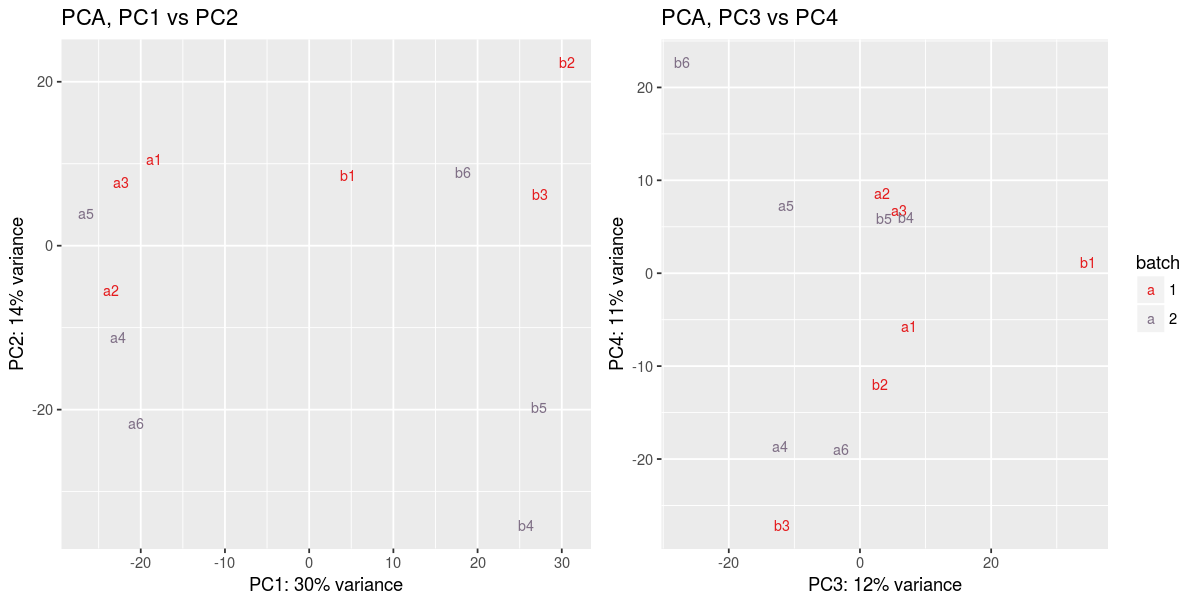

In [9]:
p1_1 <- plot_pca(data_df, design_df, 1, 2, "batch", colors=4, custom_names=design_df$name, legend=F)
p1_2 <- plot_pca(data_df, design_df, 3, 4, "batch", colors=4, custom_names=design_df$name, legend=T)
options(repr.plot.width=10, repr.plot.height=5)
multiplot(p1_1, p1_2, cols=2)


# Differential expression

Differential expression is performed by applying an ANOVA comparing the samples from condition 'a' and condition 'b'. This is performed both without and with compensation for the batch factor.

Here, vectors with the calculated q-values for each method are stored in the list `q_vectors`. The true/false call for a significance threshold of 0.1 is stored in the list `sig_vectors`.

In [10]:
sig_vectors <- list()
q_vectors <- list()

In [11]:
calculate_anova <- function(row, cond, batch=NULL) {
    
    if (!is.null(batch)) {
        anova_df <- data.frame(cbind(Intensity=unlist(row), Cond=cond, Batch=batch))        
        av <- aov(Intensity~Cond+Batch, anova_df)        
    }
    else {
        anova_df <- data.frame(cbind(Intensity=unlist(row), Cond=cond))
        av <- aov(Intensity~Cond, anova_df)                
    }
    
    av_summary <- summary(av)
    p_val <- av_summary[[1]]["Cond", "Pr(>F)"]
    p_val
}

The `truth_vector` takes two vectors with booleans. The first shows to if a feature has been measured as true or false. The second shows if the feature actually is differentially expressed (i.e. if it is a spike-in feature). It is then assigned a string showing whether it was a true/false call of a positive or negative.

This vector is then used to print all the numbers, as well as calculating the measures:

* Specificity
* Precision
* Recall
* F1-score, defined as 2 \* (precision \* recall) / (precision + recall)

In [12]:
get_truth_vector <- function(measured_pos_vect, actually_pos_vect) {
    
    truth_vector <- c()
    
    for (i in 1:length(measured_pos_vect)) {
        
        measured_pos <- measured_pos_vect[i]
        actually_pos <- actually_pos_vect[i]
        
        if (measured_pos && actually_pos) {
            outcome <- "TP"
        }
        else if (!measured_pos && !actually_pos) {
            outcome <- "TN"
        }
        else if (measured_pos && !actually_pos) {
            outcome <- "FP"
        }
        else if (!measured_pos && actually_pos) {
            outcome <- "FN"
        }
        else {
            stop(paste("Unknown state, measured_pos:", measured_pos, 
                       ", actually_pos:", actually_pos))
        }
        
        truth_vector <- c(truth_vector, outcome)
    }
    
    truth_vector
}

get_truth_summary_vector <- function(truth_vector) {
    
    truth_table <- table(truth_vector)
    
    TP <- truth_table["TP"]
    TN <- truth_table["TN"]
    FP <- truth_table["FP"]
    FN <- truth_table["FN"]
    
    specificity <- TN / (TN + FP)
    precision <- TP / (TP + FP)
    recall <- TP / (TP + FN)
    fscore <- 2 * (precision * recall) / (precision + recall)
  
    sum_v <- c(TP, TN, FP, FN, specificity, precision, recall, fscore)
    names(sum_v) <- c("TP", "TN", "FP", "FN", "specificity", "precision", "recall", "fscore")
    sum_v
}

## Without batch correction

Calculating differential expression on data without any batch-effect compensation.

In [13]:
p_vals <- unlist(apply(data_df, 1, calculate_anova, cond=design_df$condition))
q_vals <- as.numeric(p.adjust(p_vals, method="BH"))
sig_indices <- which(q_vals < 0.1)

truth_vector <- get_truth_vector(q_vals < 0.1, spike_col)
sig_vectors[["default"]] <- truth_vector
q_vectors[["default"]] <- q_vals

## With batch correction

Calculating differential expression including the batch effect as a factor used for the ANOVA model.

In [14]:
p_vals <- unlist(apply(data_df, 1, calculate_anova, cond=design_df$condition, batch=design_df$batch))
q_vals <- as.numeric(p.adjust(p_vals, method="BH"))
sig_indices <- which(q_vals < 0.1)

truth_vector <- get_truth_vector(q_vals < 0.1, spike_col)
sig_vectors[["batch_corr"]] <- truth_vector
q_vectors[["batch_corr"]] <- q_vals

# Run ComBat to adjust

ComBat is an algorithm attempting to remove batch effects from expression data. It takes a factor distinguishing the known batch effect levels. It produces a new dataset which then in turn is used for differential expression between the conditions.

## ComBat modelling condition

Here, the condition is included in the ComBat modelling.

In [15]:
modcombat <- model.matrix(~1+condition, data=design_df)
modcombat

,(Intercept),conditionb
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,1
8,1,1
9,1,1
10,1,1


Found 2 batches
Adjusting for 1 covariate(s) or covariate level(s)
Standardizing Data across genes
Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data


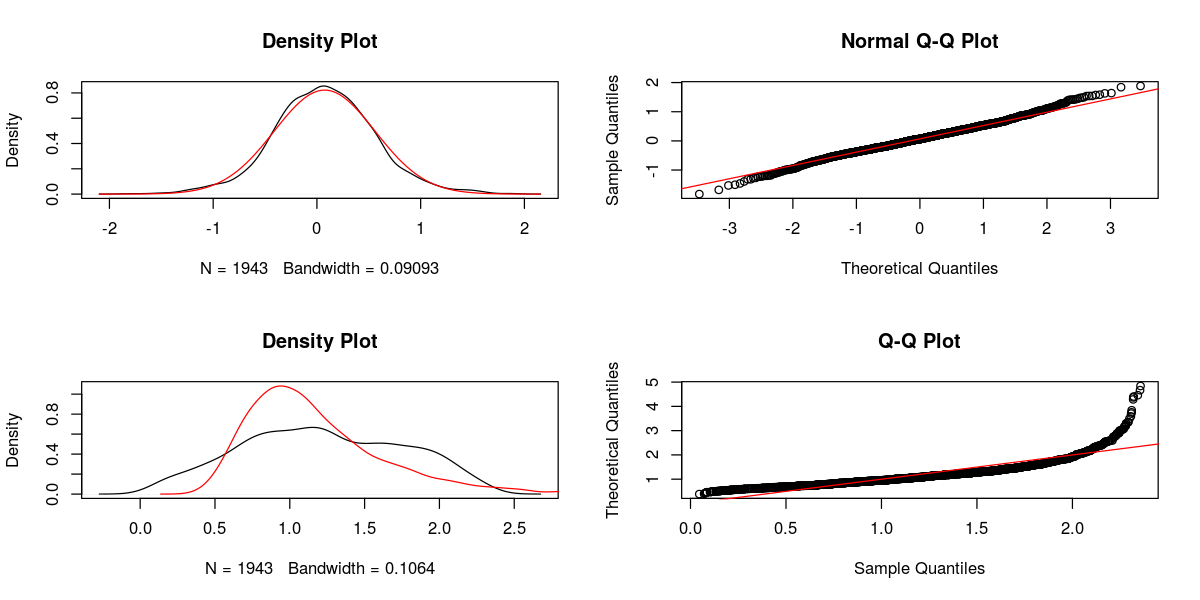

In [16]:
combat_data_df <- ComBat(dat=data_df, batch=design_df$batch, mod=modcombat, par.prior=TRUE, prior.plots=TRUE)

In [17]:
head(combat_data_df)

a1,a2,a3,a4,a5,a6,b1,b2,b3,b4,b5,b6
27.57551,27.02772,27.03980,27.27201,27.07539,27.56651,27.47017,27.07612,27.10022,27.15739,26.98593,26.79883
25.73641,25.50679,24.56356,24.96490,25.52146,25.48402,25.15896,24.41058,24.57843,24.12868,23.56623,25.65570
26.42898,26.73191,26.69068,26.83931,26.71549,26.85655,26.63414,26.87932,26.31214,26.54469,26.76089,26.76986
26.62928,26.14897,26.48392,26.72006,26.32921,26.40238,27.63353,28.27031,27.95467,28.04159,28.04130,27.66938
26.13797,26.22861,26.32482,25.95058,26.34387,26.01015,26.13424,26.41175,25.85874,26.16113,26.05263,26.08395
26.58932,26.01149,26.04289,26.22186,25.98380,26.55887,26.46450,26.15508,26.08473,26.37189,26.13723,25.92322


## ComBat PCA

Here, we visualize how the PCA plot for the ComBat processed data compare to the unprocessed data (looking at the two major principal components).

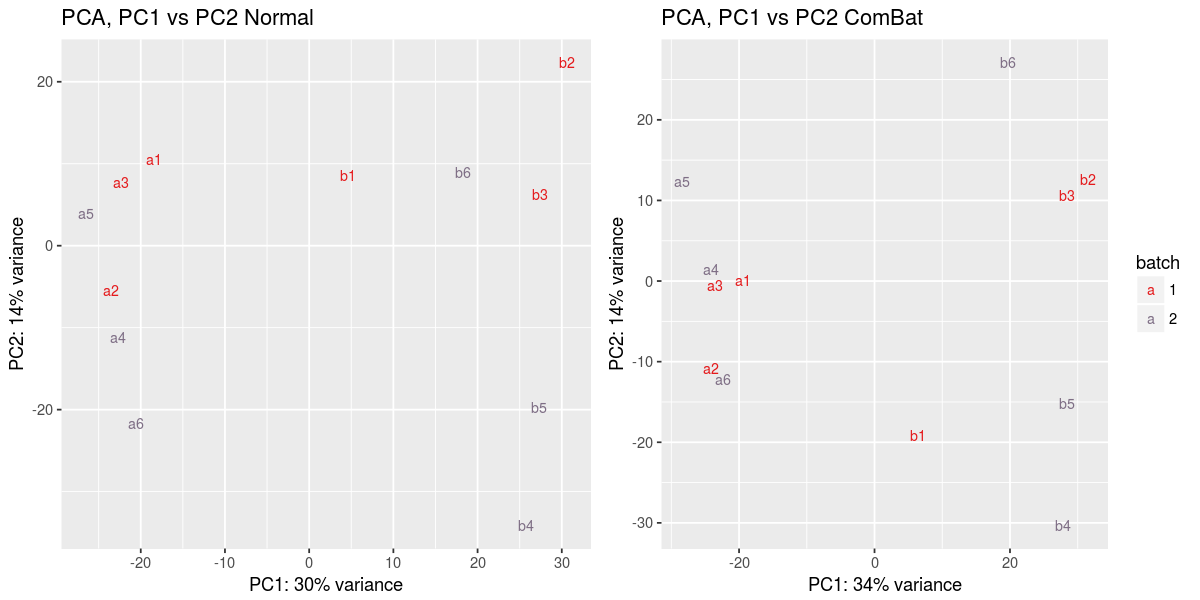

In [18]:
p1_1 <- plot_pca(data_df, design_df, 1, 2, "batch", colors=4, custom_names=design_df$name, legend=F, title_app="Normal")
p1_2 <- plot_pca(combat_data_df, design_df, 1, 2, "batch", colors=4, custom_names=design_df$name, legend=T, title_app="ComBat")
options(repr.plot.width=10, repr.plot.height=5)
multiplot(p1_1, p1_2, cols=2)


### Calculate statistics

In [19]:
p_vals <- unlist(apply(combat_data_df, 1, calculate_anova, cond=design_df$condition))
q_vals <- as.numeric(p.adjust(p_vals, method="BH"))
sig_indices <- which(q_vals < 0.1)

truth_vector <- get_truth_vector(q_vals < 0.1, spike_col)
sig_vectors[["combat"]] <- truth_vector
q_vectors[["combat"]] <- q_vals

## ComBat not modelling biological factor

In order to investigate whether how ComBat uses the known condition differences I tried running it without any other information than the batch differences.

Found 2 batches
Adjusting for 0 covariate(s) or covariate level(s)
Standardizing Data across genes
Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data


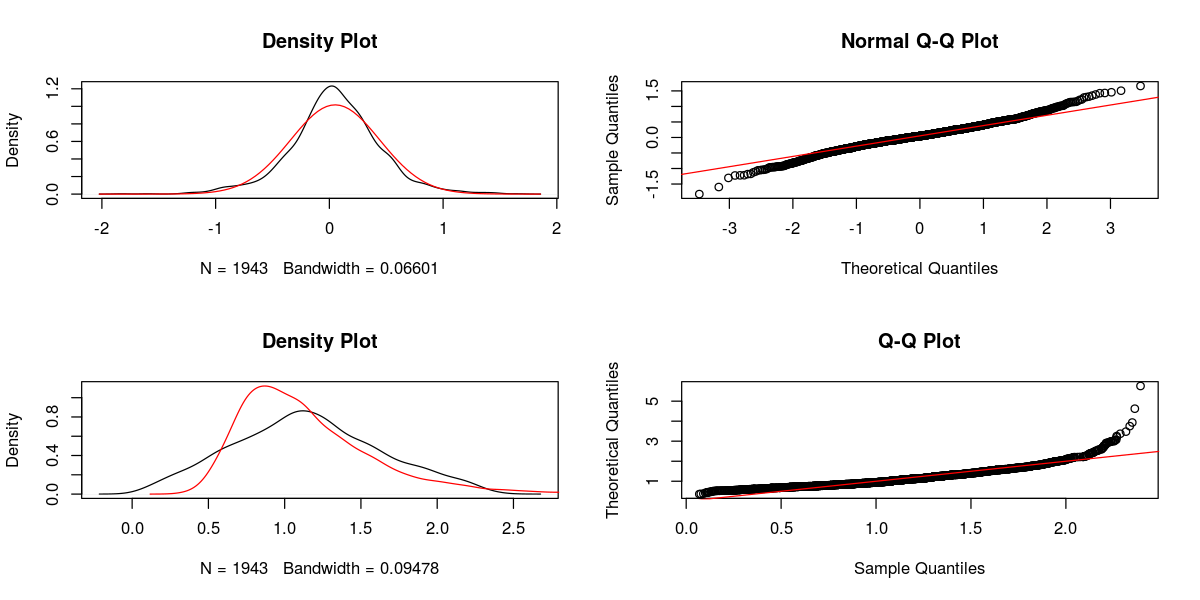

In [20]:
modcombat <- model.matrix(~1, data=design_df)
only_int_combat_data_df <- ComBat(dat=data_df, batch=design_df$batch, mod=modcombat, par.prior=TRUE, prior.plots=TRUE)

### ComBat without condition-modelling PCA

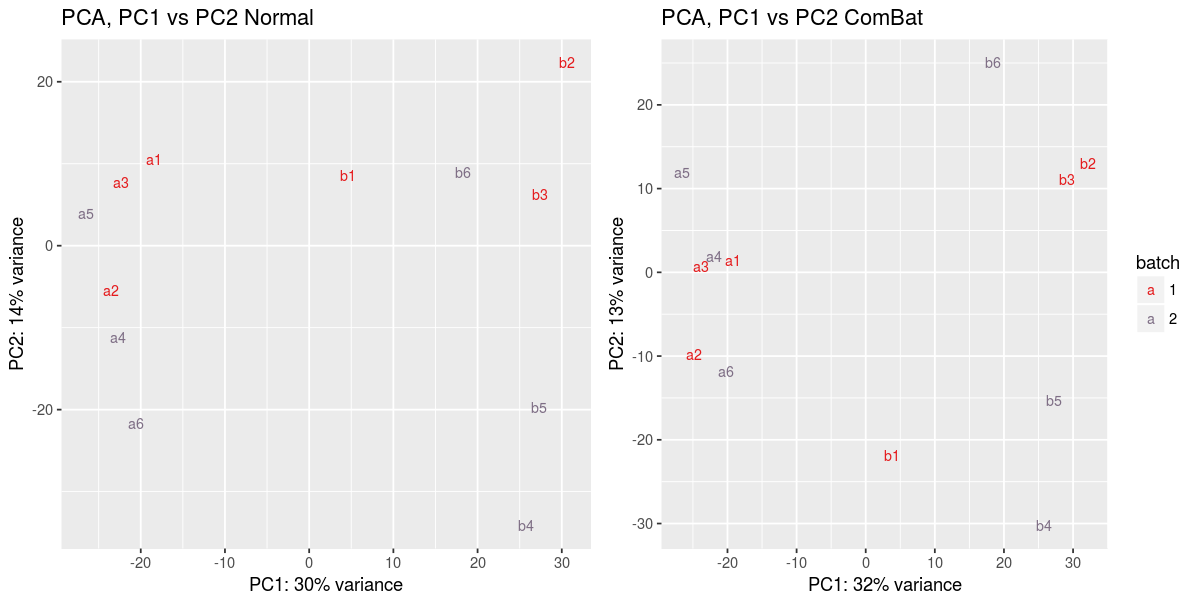

In [21]:
p1_1 <- plot_pca(data_df, design_df, 1, 2, "batch", colors=4, custom_names=design_df$name, legend=F, title_app = "Normal")
p1_2 <- plot_pca(only_int_combat_data_df, design_df, 1, 2, "batch", colors=4, custom_names=design_df$name, legend=T, title_app="ComBat")
options(repr.plot.width=10, repr.plot.height=5)
multiplot(p1_1, p1_2, cols=2)


### Statistics

In [22]:
p_vals <- unlist(apply(only_int_combat_data_df, 1, calculate_anova, cond=design_df$condition))
q_vals <- as.numeric(p.adjust(p_vals, method="BH"))
sig_indices <- which(q_vals < 0.1)

truth_vector <- get_truth_vector(q_vals < 0.1, spike_col)
sig_vectors[["combat_no_factor"]] <- truth_vector
q_vectors[["combat_no_factor"]] <- q_vals

# Estimate surrogate variation

An alternative to using ComBat to model known batch levels is to estimate the 'surrogate variation' directly from the data.

## Setup model matrices and estimate number of surrogate variables

In [23]:
mod <- model.matrix(~condition, data=design_df)
mod0 <- model.matrix(~1, data=design_df)

## Perform surrogate variation analysis

In [24]:
n.sv <- num.sv(data_df, mod, method="leek")
data_m <- as.matrix(data_df)
svobj <- sva(data_m, mod, mod0, n.sv=n.sv)

Number of significant surrogate variables is:  3 
Iteration (out of 5 ):1  2  3  4  5  

## Calculate significance values

In [25]:
pValues <- f.pvalue(data_m, mod, mod0)
qValues <- p.adjust(pValues, method="BH")

modSv <- cbind(mod, svobj$sv)
mod0Sv <- cbind(mod0, svobj$sv)
pValuesSv <- f.pvalue(data_m, modSv, mod0Sv)
qValuesSv <- p.adjust(pValuesSv, method="BH")

In [26]:
truth_vector <- get_truth_vector(measured_pos_vect=qValuesSv < 0.1, actually_pos_vect=spike_col)
sig_vectors[["sva"]] <- truth_vector
q_vectors[["sva"]] <- qValuesSv

# Summarize significance

Display of the number of identified positives (and number of true positives), as well as summary of important significance measures.

In [27]:
print(paste("True positives:", length(spike_col[spike_col])))
print("Sig counts:")
for (name in names(q_vectors)) {
    q_vector <- q_vectors[[name]]
    print(paste0(name, ": ", length(q_vector[which(q_vector < 0.1)])))
}

[1] "True positives: 422"
[1] "Sig counts:"
[1] "default: 529"
[1] "batch_corr: 544"
[1] "combat: 617"
[1] "combat_no_factor: 568"
[1] "sva: 507"


In [28]:
truth_summary_table <- data.frame(matrix(NA, nrow=0, ncol=8))

for (sig_v in names(sig_vectors)) {
    sum_v <- data.frame(get_truth_summary_vector(sig_vectors[[sig_v]]))
    sum_row <- unlist(sum_v)
    
    truth_summary_table <- rbind(truth_summary_table, sum_row)
}

colnames(truth_summary_table) <- c("TP", "TN", "FP", "FN", "specificity", "precision", "recall", "fscore")
rownames(truth_summary_table) <- names(sig_vectors)

truth_summary_table

,TP,TN,FP,FN,specificity,precision,recall,fscore
default,406,1398,123,16,0.9191321,0.7674858,0.9620853,0.8538381
batch_corr,407,1384,137,15,0.9099277,0.7481618,0.9644550,0.8426501
combat,412,1316,205,10,0.8652202,0.6677472,0.9763033,0.7930703
combat_no_factor,410,1363,158,12,0.8961210,0.7218310,0.9715640,0.8282828
sva,415,1429,92,7,0.9395135,0.8185404,0.9834123,0.8934338
